In [54]:
#Group1-Daniella Edieleyne Valdes-Vazquez, Ekdev Rajkitkul, Kristie Ulloa Yoshikawa
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')



In [55]:
vaccine_data = pd.read_csv(r'C:\Users\danie\country_vaccinations.csv') 

In [8]:
# Understanding our data and the values for each country
vaccine_data['country'].value_counts()

Denmark             353
Norway              351
Latvia              351
United States       343
Canada              342
                   ... 
Pitcairn             85
Tanzania             83
Falkland Islands     67
Niue                 43
Burundi              28
Name: country, Length: 223, dtype: int64

In [9]:
#Shows percentage of how many missing values are in each colum.
vaccine_data.isnull().sum() / vaccine_data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.461914
people_vaccinated                      0.489134
people_fully_vaccinated                0.536863
daily_vaccinations_raw                 0.559785
daily_vaccinations                     0.005233
total_vaccinations_per_hundred         0.461914
people_vaccinated_per_hundred          0.489134
people_fully_vaccinated_per_hundred    0.536863
daily_vaccinations_per_million         0.005233
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [10]:
#Drops the missing values in the dataframe
clean_data = vaccine_data.dropna()

#Checks to see if the above line worked (it did)
clean_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [11]:
#This line puts two columns in dataframe and drops rows with NA values
sub_data = clean_data[["country","date","people_fully_vaccinated"]]

print(sub_data.head(5))

         country        date  people_fully_vaccinated
94   Afghanistan  2021-05-27                 113739.0
101  Afghanistan  2021-06-03                 148505.0
305      Albania  2021-02-18                    611.0
387      Albania  2021-05-11                 181586.0
388      Albania  2021-05-12                 187921.0


In [12]:
#Double Checks to see if sub dataframe was done correctly
sub_data.isnull().sum()

country                    0
date                       0
people_fully_vaccinated    0
dtype: int64

In [13]:
#Subsets United States data from the original dataset.
US_data = sub_data.loc[sub_data["country"] == "United States"]
#Prints the subset dataframe to prepare for plotting
US_data

,country,date,people_fully_vaccinated
56081,United States,2020-12-14,3961.0
56082,United States,2020-12-15,4156.0
56083,United States,2020-12-16,4538.0
56084,United States,2020-12-17,5100.0
56085,United States,2020-12-18,6084.0
...,...,...,...
56418,United States,2021-11-16,194387418.0
56419,United States,2021-11-17,194533746.0
56420,United States,2021-11-18,194627683.0
56421,United States,2021-11-19,194643878.0


In [49]:
#Changes the people_fully_vaccinated colum from string elements to integer elements
pd.to_numeric(US_data["people_fully_vaccinated"])


56081     0.001190
56082     0.001248
56083     0.001363
56084     0.001532
56085     0.001827
           ...    
56418    58.389491
56419    58.433445
56420    58.461661
56421    58.466526
56422    58.466526
Name: people_fully_vaccinated, Length: 342, dtype: float64

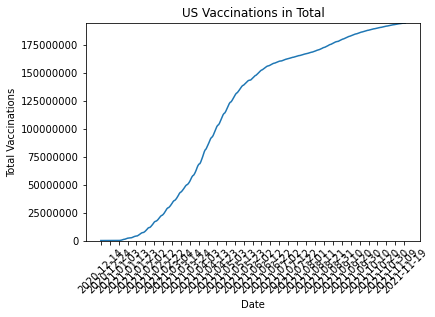

In [17]:
#Plots the graph of US Total Vaccinations
#MATPLOTLIB GRAPH

x = US_data["date"]
y = US_data["people_fully_vaccinated"]

plt.plot(x,y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 10), rotation =45)
plt.ylim(0,max(y))
plt.title("U.S. Vaccinations in Total")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

plt.show()

In [19]:
#Subsets Portugal Data
Portugal_data = sub_data.loc[sub_data["country"] == "Portugal"]

In [20]:
#Plots the graph of U.S. Total Vaccinations
#MATPLOTLIB GRAPH

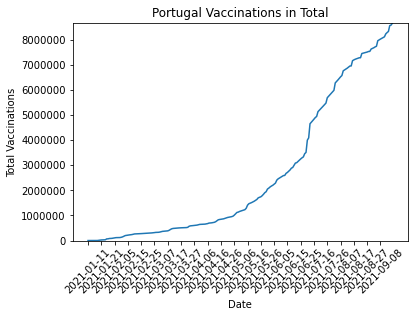

In [22]:
x = Portugal_data["date"]
y = Portugal_data["people_fully_vaccinated"]

plt.plot(x,y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 10), rotation = 45)
plt.ylim(0,max(y))
plt.title("Portugal Vaccinations in Total")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

plt.show()

In [23]:
#Computing poplulation percentages - using population constant from dataset
US_data['people_fully_vaccinated'] = (US_data['people_fully_vaccinated'].div(332915074))*100
print(US_data['people_fully_vaccinated'])

56081     0.001190
56082     0.001248
56083     0.001363
56084     0.001532
56085     0.001827
           ...    
56418    58.389491
56419    58.433445
56420    58.461661
56421    58.466526
56422    58.466526
Name: people_fully_vaccinated, Length: 342, dtype: float64


In [31]:
df = (Portugal_data['people_fully_vaccinated'].div(10167923.0))*100
df2 = Portugal_data['date']
print(df)

42560     0.001357
42561     0.001357
42562     0.001357
42563     0.001357
42564     0.001357
           ...    
42805    81.618350
42806    82.066819
42813    84.368233
42814    84.554240
42819    85.341893
Name: people_fully_vaccinated, Length: 230, dtype: float64


In [50]:
dates = pd.to_datetime(Portugal_data['date'])
print(dates)
percent = df

42560   2021-01-11
42561   2021-01-12
42562   2021-01-13
42563   2021-01-14
42564   2021-01-15
           ...    
42805   2021-09-13
42806   2021-09-14
42813   2021-09-21
42814   2021-09-22
42819   2021-09-27
Name: date, Length: 230, dtype: datetime64[ns]


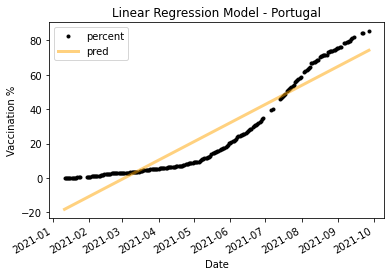

In [41]:
data_time = np.asanyarray(dates)
data_percent = np.asanyarray(percent)
df = pd.DataFrame({'time': data_time, 'percent': data_percent })
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1, 1), df['percent'].values.reshape(-1,1))

#Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1,1))
df['pred'] = y_pred
ax = df.plot(x='time', y='percent', color='black', style='.')
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('Linear Regression Model - Portugal')
ax.set_xlabel('Date')
ax.set_ylabel('Vaccination %')

plt.show()

In [52]:
dates = pd.to_datetime(US_data['date'])
percent = df
df = (US_data['people_fully_vaccinated'])
df2 = US_data['date']
US_data

,country,date,people_fully_vaccinated
56081,United States,2020-12-14,0.001190
56082,United States,2020-12-15,0.001248
56083,United States,2020-12-16,0.001363
56084,United States,2020-12-17,0.001532
56085,United States,2020-12-18,0.001827
...,...,...,...
56418,United States,2021-11-16,58.389491
56419,United States,2021-11-17,58.433445
56420,United States,2021-11-18,58.461661
56421,United States,2021-11-19,58.466526


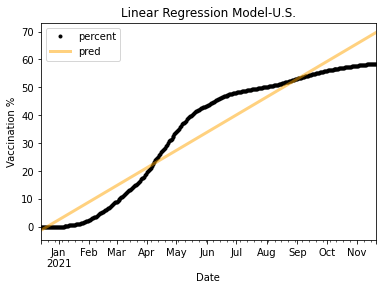

In [53]:
data_time = np.asanyarray(dates)
data_percent = np.asanyarray(percent)
df = pd.DataFrame({'time': data_time, 'percent': data_percent})
df.time = pd.to_datetime(df.time)

regr = linear_model.LinearRegression()
regr.fit(df.time.values.reshape(-1,1), df['percent'].values.reshape(-1,1))

#Make predictions using the testing set
y_pred = regr.predict(df.time.values.astype(float).reshape(-1,1))
df['pred'] = y_pred
ax = df.plot(x='time', y='percent', color='black', style='.')
df.plot(x='time', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('Linear Regression Model-U.S.')
ax.set_xlabel('Date')
ax.set_ylabel('Vaccination %')

plt.show()